# TRAIN PREPROCESSED EDA

### 1| LOAD PROCESSED TRAIN DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load processed train data
train_prep = pd.read_csv("train_preprocessed_15s_stepwise.csv", parse_dates=["datetime"])
train_prep.head()

,datetime,power,fridge,home_id
0,2012-11-09 22:28:15+00:00,599.0,85.0,home_1
1,2012-11-09 22:28:30+00:00,599.0,85.0,home_1
2,2012-11-09 22:28:45+00:00,599.0,85.0,home_1
3,2012-11-09 22:29:00+00:00,599.0,85.0,home_1
4,2012-11-09 22:29:15+00:00,599.0,85.0,home_1


## 2| INFO + SHAPE + HOUSEHOLDS

In [3]:
print("DATA INFO")
print(train_prep.info(), "\n")

print("Shape:", train_prep.shape)
print("\nHousehold counts:")
print(train_prep["home_id"].value_counts())

DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7853953 entries, 0 to 7853952
Data columns (total 4 columns):
 #   Column    Dtype              
---  ------    -----              
 0   datetime  datetime64[ns, UTC]
 1   power     float64            
 2   fridge    float64            
 3   home_id   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(1)
memory usage: 239.7+ MB
None 

Shape: (7853953, 4)

Household counts:
home_id
home_1    4529228
home_2    1350951
home_4    1184301
home_5     789473
Name: count, dtype: int64


### 3| TIME RANGES

In [4]:
train_prep.groupby("home_id")["datetime"].agg(["min", "max"])

,min,max
home_id,,
home_1,2012-11-09 22:28:15+00:00,2015-01-05 06:15:00+00:00
home_2,2013-02-17 16:17:30+00:00,2013-10-10 05:15:00+00:00
home_4,2013-03-09 14:40:00+00:00,2013-10-01 05:15:00+00:00
home_5,2014-06-29 16:23:45+00:00,2014-11-13 17:51:45+00:00


### 4| SAMPLING FREQUENCY VERIFICATION

In [5]:
deltas = (train_prep
          .sort_values(["home_id", "datetime"])
          .groupby("home_id")["datetime"]
          .diff()
          .dt.total_seconds())

deltas.dropna().value_counts().head(10)

datetime
15.0    7853949
Name: count, dtype: int64

### 5| POWER HISTOGRAM

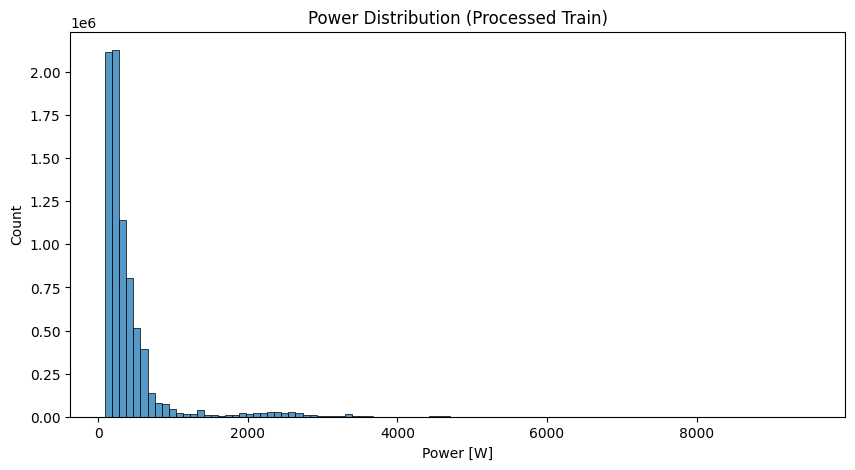

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(train_prep["power"], bins=100, kde=False)
plt.title("Power Distribution (Processed Train)")
plt.xlabel("Power [W]")
plt.ylabel("Count")
plt.show()

6| FRIDGE HISTOGRAM

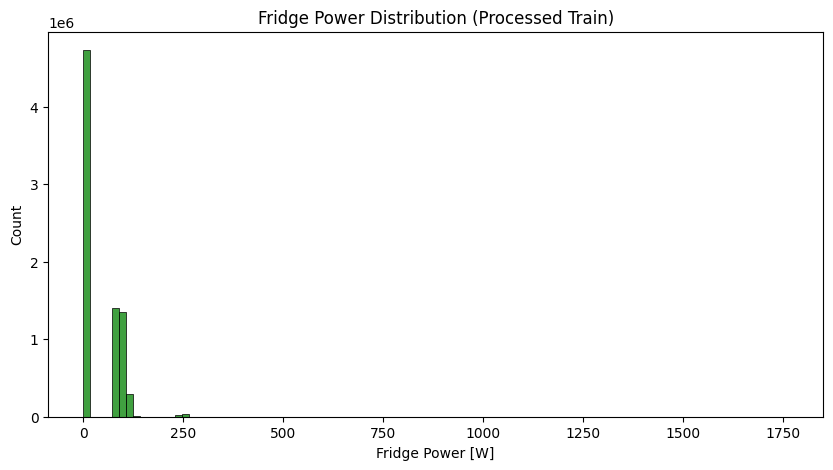

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(train_prep["fridge"], bins=100, kde=False, color="green")
plt.title("Fridge Power Distribution (Processed Train)")
plt.xlabel("Fridge Power [W]")
plt.ylabel("Count")
plt.show()

### 7| COMPARE HOUSEHOLDS

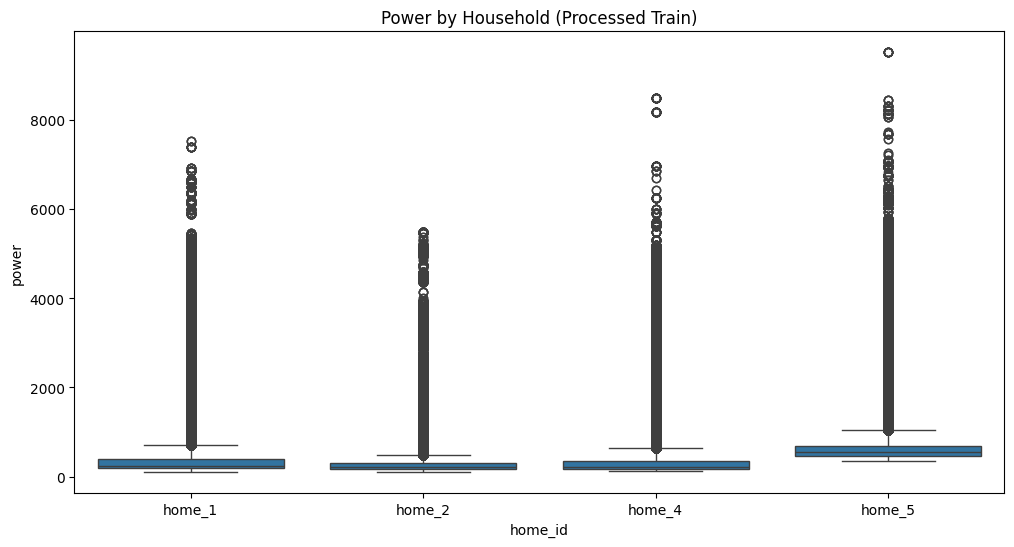

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_prep, x="home_id", y="power")
plt.title("Power by Household (Processed Train)")
plt.show()

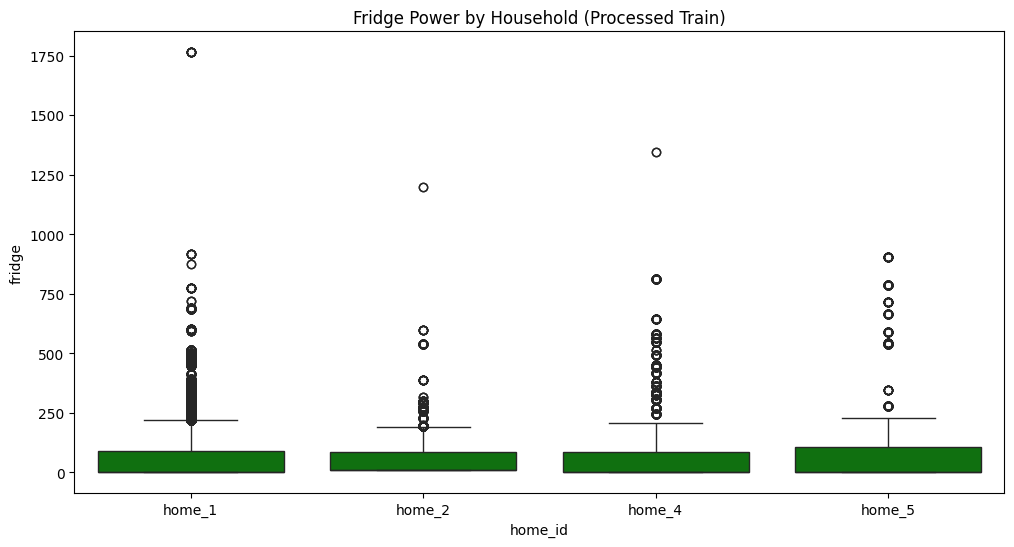

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_prep, x="home_id", y="fridge", color="green")
plt.title("Fridge Power by Household (Processed Train)")
plt.show()

### 8| SAMPLE PLOTS PER HOUSEHOLDS

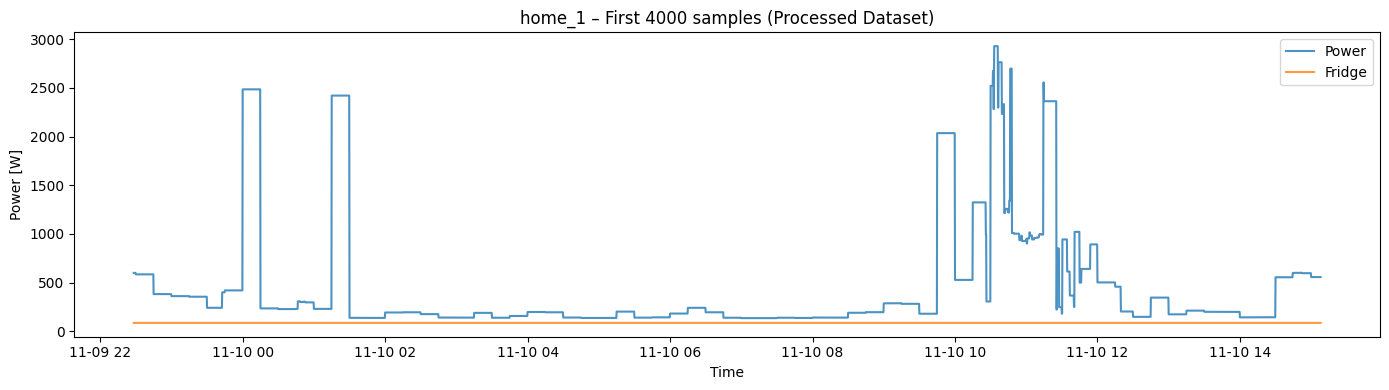

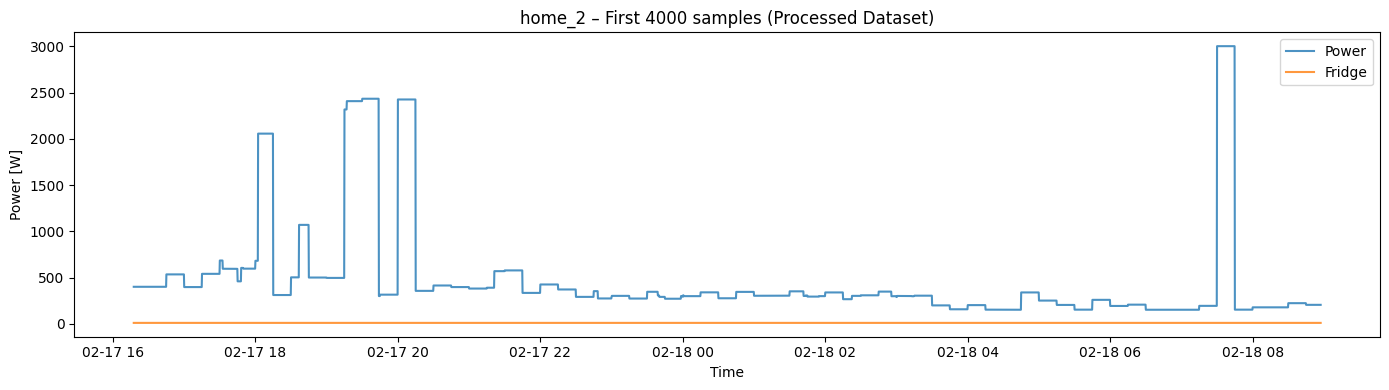

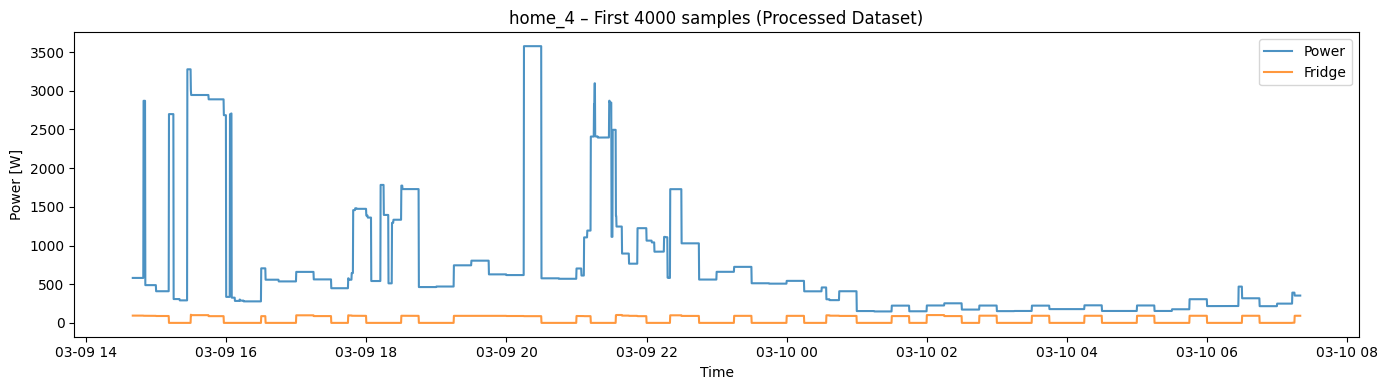

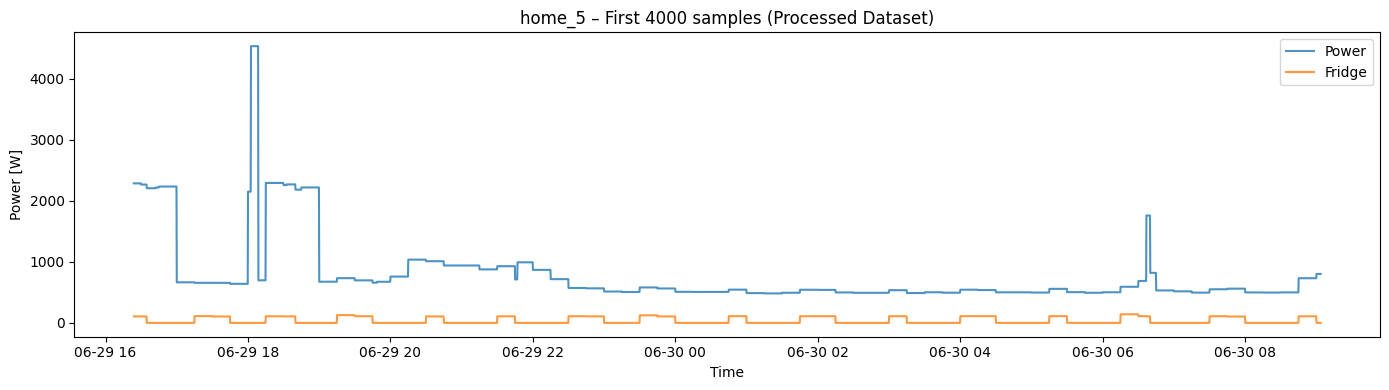

In [10]:
for home in train_prep["home_id"].unique():
    subset = train_prep[train_prep["home_id"] == home].iloc[:4000]

    plt.figure(figsize=(14,4))
    plt.plot(subset["datetime"], subset["power"], label="Power", alpha=0.8)
    plt.plot(subset["datetime"], subset["fridge"], label="Fridge", alpha=0.8)
    plt.title(f"{home} – First 4000 samples (Processed Dataset)")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Power [W]")
    plt.tight_layout()
    plt.show()

### 9| MISSING VALUES

In [11]:
train_prep.isna().mean()

datetime    0.0
power       0.0
fridge      0.0
home_id     0.0
dtype: float64

In [12]:
deltas_prep = (train_prep
               .sort_values(["home_id","datetime"])
               .groupby("home_id")["datetime"]
               .diff()
               .dt.total_seconds())

deltas_prep.dropna().value_counts().head()

datetime
15.0    7853949
Name: count, dtype: int64